# EOSC 543 - Flexure-2
Francis Rossmann


_For the following exercises, assume a Young’s modulus of 7 x 10^10 Pa, Poisson’s ratio of 0.25, acceleration due to gravity of 9.81 ms-2, a density of the mantle of 3300 kgm-3, a density of crust (loads) of 2700 kgm-3, a density of sea water of 1035 kgm-3, and a density of sedimentary basin fill of 2400 kgm-3._

_For each problem include a diagram setting up the problem (5 points), the equations that you will use (5 points), and then solve the equations (10 points).  You may use a spreadsheet to conduct the calculations.  Print or draft the deflected crustal profile for each question (10 points)._ 


Set up the preliminaries for the assignment and define constants: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# preliminaries:
youngs_mod = 7e10  # youngs modulus [Pa]
poissons_ratio = 0.25  # poisson's ratio
gravity = 9.81  # gravity [ms-2]
rho_mantle = 3300  # mantle density [kgm-3]
rho_crust = 2700  # crust density [kgm-3]
rho_water = 1035  # water density [kgm-3]
rho_seds = 2400  # basin fill density [kgm-3]


## Question 1. 
_Calculate the maximum deflection beneath and width of a water-filled basin surrounding an infinite line of volcanoes on an infinite (i.e., unbroken plate) with an effective elastic thickness of 20 km.  The line of volcanoes constitutes a 5 km high and 50 km wide load.  Use the equations for line loading from lecture 2 to calculate wo  and xo._

### Problem set-up

A diagram setting up the problem is printed underneath code block, with solution plotted on top. Figure is vertically exaggerated.  


We are given the following:   

Youngs modulus:   $E = 7e10 Pa$   
Poisson's ratio:   $v = 0.25$     
Gravity:  $g = 9.81 ms^{-2}$     
Mantle density:  $\rho_{m} = 3300 kgm^{-3}$     
Crust density:  $\rho_c = 2700 kgm^{-3}$     
Water density:  $\rho_w = 1035 kgm^{-3}$     
Seds density:  $\rho_s = 2400 kgm^{-3}$    
Elastic thickness:  $h = 20 km$   
Block **halfwidth**:  $L = 25km$    

### Solution

We can easily calculate flexural rigidity from elastic thickness: 
$$ D=\frac{E h^{3}}{12\left(1-v^{2}\right)} $$. 

Implementing in code below, $D = 4.98\cdot10^{22} Nm^{-2}$. 


Calculate flexural parameter $\alpha$ from flexural rigidity: 
$$ \alpha=\left[\frac{4 D}{\left(\rho_{m}-\rho_{w}\right) g}\right]^{1 / 4} $$ 

We find $\alpha = 54.7 km$.    

Next, solve the flexure equations for single block as provided in the lecture notes. Note that the width of the block is $50km$ - I interpret this as being 50km centered about the origin. Lecture notes explicitly call for the block **halfwidth** to be used in solving this equation, so I take halfwidth $L$ as $L = 25km$. 

To solve this problem, I use the equations from lecture notes 2:    


D1:   for $0 \leq x \leq L$:      
$$ 
w(x) = \left[\frac{\rho_Lh_L}{2(\rho_m - \rho_s)}\right]\left[2 - e^{-\frac{(x+L)}{\alpha}}\cos(\frac{x+L}{\alpha}) - e^{-\frac{(L-x)}{\alpha}}\cos(\frac{L-x}{\alpha})\right]
$$

D2:   for $x \geq L$: 
$$
w(x) = \left[\frac{\rho_Lh_L}{2(\rho_m - \rho_s)}\right]\left[e^{-\frac{(x-L)}{\alpha}}\cos(\frac{x-L}{\alpha}) - e^{-\frac{(L+x)}{\alpha}}\cos(\frac{L+x}{\alpha})\right]
$$


Coding equations D1 and D2 up with the following parameters in the cell below: 
   
$L = 25km$  
$h = 5km$  
$\rho_L =\rho_c = 2700 kgm^{-3}$  
$\rho_m = 3300 kgm^{-3}$   
$\rho_s = 2400 kgm^{-3}$  
$\rho_w = 1035 kgm^{-3}$  
$\alpha = 115.9 km$   



### Results: (see code printout and figure below) 
- Flexural rigidity is 4.98e+22 Nm-2
- Flexural parameter has value: 54.71 km
- Deflection at edge of volcanic island load is -2.3 km.
- Maximum deflection at origin of -2.6 km.
- First node at 131.82 km.

Flexural rigidity is 4.98e+22 Nm-2
Flexural parameter has value: 54.71 km
Deflection at edge of volcanic island load is -2.3 km.
Maximum deflection at origin of -2.6 km.
First node at 131.82 km.


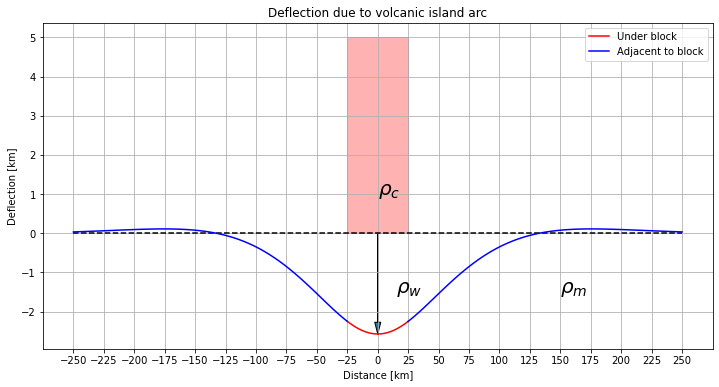

In [2]:
# simple distributed load
length = 50 * 1000  # note this is the half width of the island chain
height = 5 * 1000

elastic_thickness = 20 * 1000  # [m]
flexural_rigidity = (youngs_mod * (elastic_thickness ** 3)) / (
    12 * (1 - (poissons_ratio ** 2))
)
alpha = ((4 * flexural_rigidity) / ((rho_mantle - rho_water) * gravity)) ** (1 / 4)

print(f'Flexural rigidity is {flexural_rigidity:.2e} Nm-2')
print(f'Flexural parameter has value: {alpha/1000:.2f} km')


def D1(L, h, alpha, rho_mantle, rho_load, rho_fill):
    # function for equation D1 from first flexure assignment (from course notes)
    x = np.linspace(0, L, 100)
    w = ((rho_load * h) / (2 * (rho_mantle - rho_fill))) * (
        2
        - np.exp(-(x + L) / alpha) * np.cos((x + L) / alpha)
        - np.exp(-(L - x) / alpha) * np.cos((L - x) / alpha)
    )
    return -w, x


def D2(L, h, alpha, rho_mantle, rho_load, rho_fill):
    # function for equation D2 from first flexure assignment (from course notes)
    x = np.linspace(L, 10 * L, 100)
    w = ((rho_load * h) / (2 * (rho_mantle - rho_fill))) * (
        np.exp(-(x - L) / alpha) * np.cos((x - L) / alpha)
        - np.exp(-(x + L) / alpha) * np.cos((x + L) / alpha)
    )
    return -w, x


deflection_inner, x_inner = D1(
    length / 2, height, alpha, rho_mantle, rho_crust, rho_water
)
deflection_outer, x_outer = D2(
    length / 2, height, alpha, rho_mantle, rho_crust, rho_water
)

assert deflection_inner[-1] == deflection_outer[0]
print(
    f"Deflection at edge of volcanic island load is {round(deflection_inner[-1]/1000,1)} km."
)
print(f"Maximum deflection at origin of {round(deflection_inner[0]/1000,1)} km.")
print(f"First node at {x_outer[np.abs(0 - deflection_outer).argmin()]/1000:.2f} km.")

%matplotlib inline
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.plot(x_inner / 1000, deflection_inner / 1000, color='r')
ax.plot(x_outer / 1000, deflection_outer / 1000, color='b')
ax.plot(-x_inner / 1000, deflection_inner / 1000, color='r')
ax.plot(-x_outer / 1000, deflection_outer / 1000, color='b')
block = patches.Rectangle(
    (0-length/2000, 0),
    length / 1000,
    height / 1000,
    edgecolor="k",
    facecolor="r",
    alpha=0.3,
)
ax.add_patch(block)
ax.hlines(y=0,xmin=-x_outer[-1]/1000, xmax=x_outer[-1]/1000, linestyle="dashed", color="k")
ax.legend(["Under block", "Adjacent to block"])
ax.set_xlabel("Distance [km]")
ax.set_ylabel("Deflection [km]")
plt.xticks(np.arange(-x_outer[-1]/1000, x_outer[-1]/1000 + 1, 25))
plt.title("Deflection due to volcanic island arc")
plt.grid()
plt.annotate(r'$\rho_c$', (0,1), size=20);
plt.annotate(r'$\rho_m$', (150,-1.5), size=20);
plt.annotate(r'$\rho_w$', (15,-1.5), size=20);
plt.arrow(0,0, 0, deflection_inner[0]/1000, head_width=5, head_length=0.3,length_includes_head=True);

## Question 2
_Next consider a broad mountain belt that can be characterized by 5 blocks, each 20 km wide that decrease in height from the hinterland to the foreland from 5 to 1 km.  Assume that these sit on an infinite plate with an effective elastic thickness of 40 km.  Calculate the total subsidence in a filled sedimentary basin directly in front of the shortest block.  Calculate the basin width from the front of the shortest block to the zero deflection point.  You will have to use the distributed line loading approach discussed in lecture 2._


### Problem set-up:
 
 
A diagram setting up the problem is printed underneath code block, with solution plotted on top. Figure is vertically exaggerated.    

### Solution
Start this problem, solving first for flexural rigidity $D$ and flexural parameter $\alpha$. See equations used in **Question 1**, but applied for an elastic thickness $h = 40km$. Using the same form of the equation for flexural rigidity as above I calculate it as: $D = 3.98\cdot 10^{23} Nm^{-2}$.   


To calculate the flexural parameter use the same equation:
$$ \alpha=\left[\frac{4 D}{\left(\rho_{m}-\rho_{s}\right) g}\right]^{1 / 4} $$ 

Where this time the $\Delta\rho$ term is the density difference between the mantle and the sedimentary fill. Implementing in the code below, I find the flexural parameter $\alpha = 115.90$ km.


Now I can implement Magnus Wangen's numerical solution (pg. 293 of Wangen's (2010) Physical Principles of Sedimentary Basin Analysis), which is provided in the Allen & Allen textbook (with typos?). Each block can be decomposed into one point load, and the deflection profile due to that single point load is calculated. Iterating over each block we can find each deflection profile due to each point load, then sum the profiles to find the total deflection profile. We can do this because the partial differential equations for plate deflection are linear!

First, decompose each block into a point load. The five blocks are arranged in a row, with each block being 20km accross. Edge spacing is equal to: 

$$ dx = \left(x_{i}+x_{i+1}\right) = 20km$$

This means the block centres are found at 10, 30, 50, 70 and 90 km since:  
$$ x_c = \left(x_{i}+x_{i+1}\right) / 2 $$

Each point load $V_i$ at each $x_c$ is given by: 

$$V_{i}=\int_{x_{i}}^{x_{i+1}} q(x) d x \approx \frac{1}{2}\left(q\left(x_{i}\right)+q\left(x_{i+1}\right)\right)\left(x_{i+1}-x_{i}\right)$$

Where the general surface load for each block is: 

$$ F = ma = \rho V g = \rho h g \rightarrow q(x) = \rho_c g h$$

And so the numerical form of each point load at $x_c$ is given by: 

$$ V_i = \rho_c g h_i \cdot dx$$

where $h_i$ is the height of the ith block and $V_i$ is the point load of the ith block centered at $x_{c,i}$. 

The solution for deflection due to N points can then be written: 

$$ w(x)=\sum_{i=1}^{N} \frac{V_{i}}{2\Delta\rho g \alpha} f\left(\left|x-x_{c, i}\right| / \alpha\right) $$ 

Where the $\frac{V_{i}}{2\Delta\rho g \alpha}$ term is the maximum deflection for each point load and $\Delta\rho = (\rho_m - \rho_s)$ for a sediment-filled basin.

The function $f(u)$ is given as: 

$$f(u)=e^{-u}(\cos u+\sin u) $$

and

$$u = \left|x-x_{c, i}\right| / \alpha $$


Applying these equations in the code block below with the necessary parameters is simple and flexure due to each pointload can be iteratively calculated. The combined deflection profile is obtained by summing all the profiles over their (equal) length. 


### Results: 
- Flexural rigidity is 3.98e+23 Nm-2
- Flexural parameter has value: 115.90 km
- Point loads are:
    - Block 1: 2.65e+12 N
	- Block 2: 2.12e+12 N
	- Block 3: 1.59e+12 N
	- Block 4: 1.06e+12 N
	- Block 5: 5.30e+11 N
- First node is at 320.0 km from origin
- Basin width is 220.0 km from leading edge of shortest block.
- Maximum subsidence underneath load is -3.73 km at 40.00 km from origin. 
- Depth at leading edge of shortest block is -3.05 km.

Flexural rigidity is 3.98e+23 Nm-2
Flexural parameter has value: 115.90 km
Point loads are:
	Block 1: 2.65e+12 N
	Block 2: 2.12e+12 N
	Block 3: 1.59e+12 N
	Block 4: 1.06e+12 N
	Block 5: 5.30e+11 N
First node is at 320.0 km from origin
Basin width is 220.0 km from leading edge of shortest block.
Maximum subsidence underneath load is -3.73 km at 40.00 km from origin. 
Depth at leading edge of shortest block is -3.05 km.


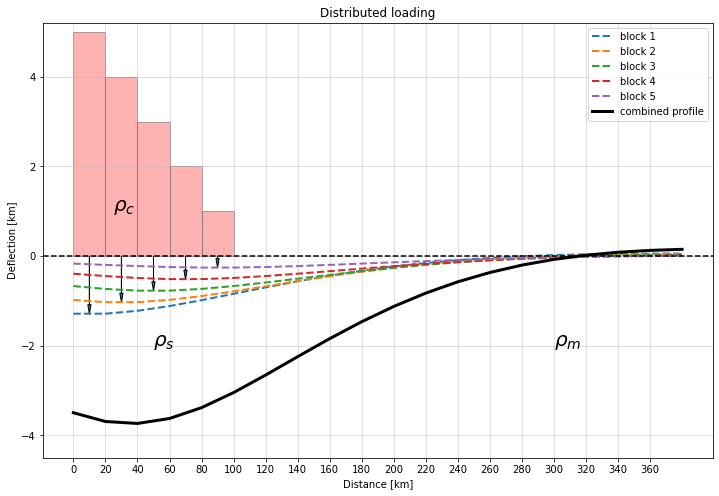

In [3]:
# multi-block distributed load
# setup blocks:
width = 20 * 1000
edges = np.arange(0, 120 * 1000, width)
centres = edges[1:] - (10 * 1000)
heights = np.arange(1, 6000, 1000)[::-1]

# solve for flexural parameter alpha:
elastic_thickness = 40 * 1000  # [m]
flexural_rigidity = (youngs_mod * (elastic_thickness ** 3)) / (
    12 * (1 - (poissons_ratio ** 2))
)  # [Nm-2]
alpha = ((4 * flexural_rigidity) / ((rho_mantle - rho_seds) * gravity)) ** (
    1 / 4
)  # [m]

print(f"Flexural rigidity is {flexural_rigidity:.2e} Nm-2")
print(f"Flexural parameter has value: {alpha/1000:.2f} km")

# calculate point loads:
Vi = np.array([(height * rho_crust * gravity * width) for height in heights])
print("Point loads are:")
for ii in range(5):
    print(f"\tBlock {ii + 1}: {Vi[ii]:.2e} N")

# function to take care of fourier-esque calculation:
def f(u):
    return np.exp(-u) * (np.cos(u) + np.sin(u))


x = np.arange(0, 20 * width, width)  # make some query points
w_array = np.ndarray((5, x.shape[0]))  # initialize an array to fill with deflections
# iteratively calculate the deflection profile for each block:
for ii in range(centres.shape[0]):
    u = np.abs(x - centres[ii]) / alpha
    w_array[ii, :] = -(Vi[ii] * f(u)) / (2 * (rho_mantle - rho_seds) * gravity * alpha)

# sum the deflection profiles from each block:
w_combined = w_array.sum(axis=0)

# Print the result
x0 = x[np.abs(0 - w_combined).argmin()]
print(f"First node is at {x0/1000} km from origin")
print(f"Basin width is {(x0 - edges[-1])/1000} km from leading edge of shortest block.")
print(
    f"Maximum subsidence underneath load is {w_combined.min()/1000:.2f} km at {x[np.abs(0 - w_combined).argmax()]/1000:.2f} km from origin. "
)
print(
    f"Depth at leading edge of shortest block is {w_combined[np.abs(x - edges[-1]).argmin()]/1000:.2f} km."
)

# plot the results:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
for ii in range(5):
    ax.plot(
        x / 1000,
        w_array[ii, :] / 1000,
        label=f"block {ii + 1}",
        linewidth=2,
        alpha=1,
        linestyle="dashed",
    )
ax.plot(x / 1000, w_combined / 1000, label="combined profile", linewidth=3, color='k')
ax.set_xlabel("Distance [km]")
ax.set_ylabel("Deflection [km]")
ax.set_ylim([-4.5, 5.2])
ax.axhline(0, color="k", linestyle="dashed")
plt.title("Distributed loading")
plt.grid(alpha=0.5)
plt.legend()
for ii in range(5):
    block = patches.Rectangle(
        (edges[ii] / 1000, 0),
        width / 1000,
        heights[ii] / 1000,
        edgecolor="k",
        facecolor="r",
        alpha=0.3,
    )
    ax.add_patch(block)
plt.annotate(r"$\rho_c$", (25, 1), size=20)
plt.annotate(r"$\rho_m$", (300, -2), size=20)
plt.annotate(r"$\rho_s$", (50, -2), size=20)
plt.xticks(np.arange(0, 361, 20))
for ii in range(5):
    plt.arrow(
        centres[ii] / 1000,
        0,
        0,
        w_array[ii, np.abs(x - centres[ii]).argmin()] / 1000,
        head_width=2,
        head_length=0.2,
        length_includes_head=True,
    )
